### Appendix

### Asset -1 - S&P 500 index

In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [2]:
df = yf.download('SPX', 
                 start='1985-01-01', 
                 end='2020-02-01',
                 progress=False)
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

In [3]:
df.head()

,adj_close,log_rtn
Date,,
2000-03-03,1.87375,-0.287685
2000-03-06,2.49834,0.287685
2000-03-07,4.37209,0.559615
2000-03-08,4.37209,0.000000
2000-03-09,4.37209,0.000000


Tthe return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


In [4]:
rets = df/df.shift(1) - 1

In [5]:
rets

,adj_close,log_rtn
Date,,
2000-03-03,NaN,NaN
2000-03-06,0.333337,-2.000000
2000-03-07,0.749998,0.945236
2000-03-08,0.000000,-1.000000
2000-03-09,0.000000,NaN
...,...,...
2018-01-24,0.000000,-1.000000
2018-01-25,0.000000,NaN
2018-01-26,-0.090909,-inf


In [6]:
rets = rets.dropna()

In [7]:
rets

,adj_close,log_rtn
Date,,
2000-03-06,0.333337,-2.000000
2000-03-07,0.749998,0.945236
2000-03-08,0.000000,-1.000000
2000-03-10,-0.485715,-inf
2000-03-13,-0.111110,-0.822879
...,...,...
2018-01-22,0.090909,inf
2018-01-23,-0.083333,-2.000000
2018-01-24,0.000000,-1.000000


In [8]:
rets = df.pct_change().dropna()

In [9]:
rets.head()

,adj_close,log_rtn
Date,,
2000-03-06,0.333337,-2.000000
2000-03-07,0.749998,0.945236
2000-03-08,0.000000,-1.000000
2000-03-10,-0.485715,-inf
2000-03-13,-0.111110,-0.822879


In [10]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3008 entries, 2000-03-06 to 2018-01-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  3008 non-null   float64
 1   log_rtn    3008 non-null   float64
dtypes: float64(2)
memory usage: 70.5 KB


<AxesSubplot:xlabel='Date'>

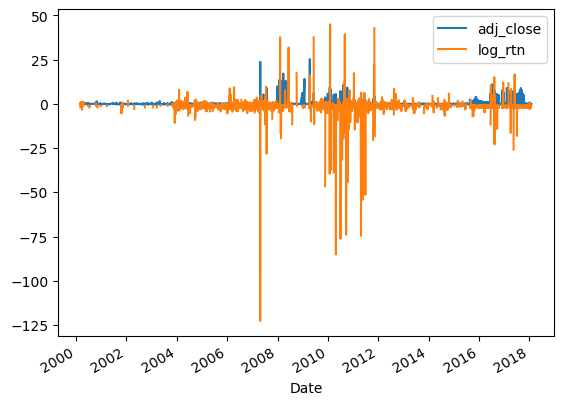

In [11]:
rets.plot()

##### Mean and Standard Deviation

In [12]:
rets.mean()

adj_close    0.23759
log_rtn          NaN
dtype: float64

In [13]:
rets.shape

(3008, 2)

In [14]:
number_of_obs = rets.shape[0]
deviations = rets - rets.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

adj_close    1.524292
log_rtn      0.000000
dtype: float64

In [15]:
rets.shape

(3008, 2)

In [16]:
rets.std()

adj_close    1.524292
log_rtn           NaN
dtype: float64

In [17]:
annualised_vol = rets.std()*np.sqrt(252)
annualised_vol

adj_close    24.197388
log_rtn            NaN
dtype: float64

In [18]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [19]:
annualize_vol(rets,252)

adj_close    24.197388
log_rtn            NaN
dtype: float64

### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$


### Activity: Annualise a 1% monthly, 4% quarterly and 0.3% daily return:

In [20]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [21]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [22]:
rd = 0.003
(1+rd)**252 - 1

1.1273312564640139

#### Annualizing the returns of our three shares

In [23]:
n_days = rets.shape[0]
ret_per_day = (rets + 1).prod()**(1/n_days)-1
ret_per_day

adj_close   -0.001204
log_rtn           NaN
dtype: float64

In [24]:
annualised_ret = (ret_per_day + 1)**252-1
annualised_ret

adj_close   -0.261828
log_rtn           NaN
dtype: float64

In [25]:
ann_ret = (rets + 1).prod()**(252/n_days)-1
ann_ret

adj_close   -0.261828
log_rtn           NaN
dtype: float64

In [26]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


In [27]:
annualize_rets(rets,252)

adj_close   -0.261828
log_rtn           NaN
dtype: float64

#### Risk-adjust returns (Sharpe Ratio) 

In [28]:
riskfree_rate = 0.03
excess_return = ann_ret - riskfree_rate
sharpe_ratio = excess_return/annualised_vol
sharpe_ratio

adj_close   -0.01206
log_rtn          NaN
dtype: float64

In [29]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [30]:
sharpe_ratio(rets,0.03,252)

adj_close   -0.011919
log_rtn           NaN
dtype: float64

In [31]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [32]:
skewness(rets)

adj_close    7.475675
log_rtn           NaN
dtype: float64

In [33]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [34]:
kurtosis(rets)

adj_close    77.56042
log_rtn           NaN
dtype: float64

#### Test of Normality

In [35]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

In [36]:
is_normal(rets)

C:\Users\Nazia\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


adj_close    False
log_rtn      False
dtype: bool

In [37]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

C:\Users\Nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


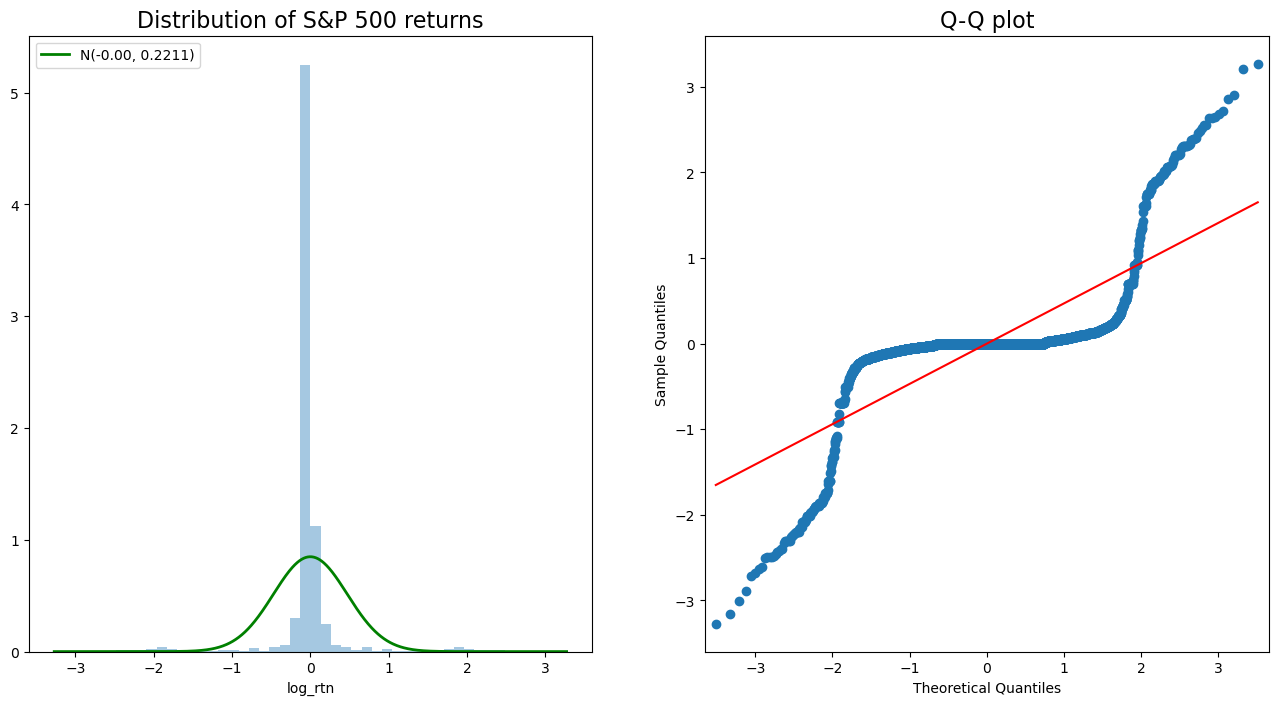

In [38]:
#Plot the histogram and the Q-Q Plot:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of S&P 500 returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

#plt.tight_layout()
#plt.savefig('Figure.png')
plt.show()

In [39]:
#Print summary statistics and check if the returns are normally distributed.

jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 2000-03-03 - 2018-01-30
Number of observations: 4488
Mean: -0.0009
Median: 0.0000
Min: -3.2703
Max: 3.2703
Standard Deviation: 0.4702
Skewness: 0.0032
Kurtosis: 17.1271
Jarque-Bera statistic: 54723.38 with p-value: 0.00


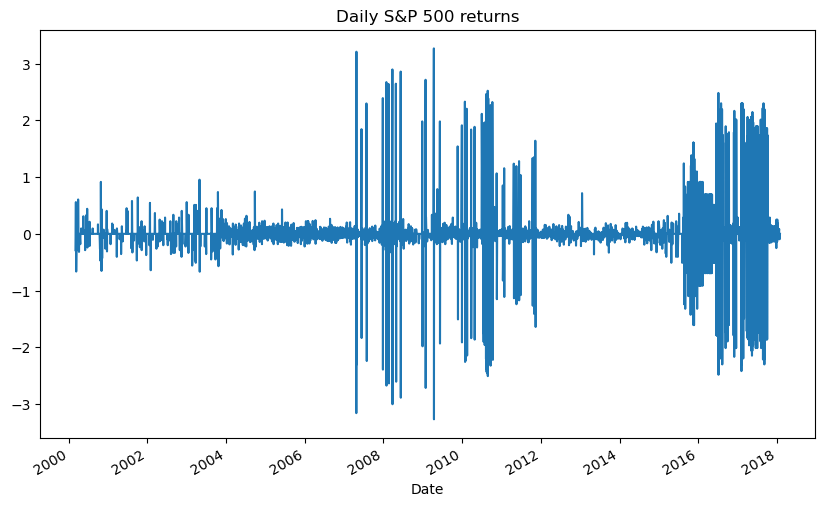

In [40]:
#Volatility Clustering
df.log_rtn.plot(title='Daily S&P 500 returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

### Market efficiency run test

In [41]:
ticker = 'SPX'
start = '1985-01-01'
end = '2020-02-01'
prices = np.array(yf.download(ticker, start, end)['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [42]:
returns=prices[1:]/prices[:-1] - 1
returns = returns[returns !=0] #filter out zero returns 
n = len(returns)
signs = np.sign(returns) #for the runs test, negatives are bearish, positives are bullish

In [43]:
runs = signs[1:] - signs[:-1] # A run is the first difference of the signs array

In [44]:
observed_runs = np.count_nonzero(runs==2) + np.count_nonzero(runs==-2) + 1
positive_returns = np.count_nonzero(signs == 1)
negative_returns = np.count_nonzero(signs == -1)
expected_runs = 2*positive_returns*negative_returns/n + 1
stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
z_stats = (observed_runs - expected_runs)/stdev_runs
p_value = 2*(1 - scs.norm.cdf(abs(z_stats)))
if p_value > 0.1:
    print('market is efficient')
elif z_stats > 0:
    print ('market is mean_reverting')
else:
    print ('market is trending')
print(observed_runs, int(expected_runs), round(stdev_runs, 2), round(z_stats, 4), round(p_value, 4))
    

market is mean_reverting
1369 1088 23.29 12.0523 0.0


### Asset -2 - Bitcoin

In [45]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [46]:
df = yf.download('BTC-GBP', 
                 start='1985-01-01', 
                 end='2020-02-01',
                 progress=False)
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

In [47]:
df.head()

,adj_close,log_rtn
Date,,
2014-09-18,258.426697,-0.084371
2014-09-19,242.429230,-0.063902
2014-09-20,251.092407,0.035111
2014-09-21,244.570435,-0.026318
2014-09-22,245.679031,0.004523


Tthe return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


In [48]:
rets = df/df.shift(1) - 1

In [49]:
rets

,adj_close,log_rtn
Date,,
2014-09-18,NaN,NaN
2014-09-19,-0.061903,-0.242608
2014-09-20,0.035735,-1.549452
2014-09-21,-0.025974,-1.749552
2014-09-22,0.004533,-1.171846
...,...,...
2020-01-27,0.036667,0.286937
2020-01-28,0.053125,0.437386
2020-01-29,-0.004348,-1.084175


In [50]:
rets = rets.dropna()

In [51]:
rets

,adj_close,log_rtn
Date,,
2014-09-19,-0.061903,-0.242608
2014-09-20,0.035735,-1.549452
2014-09-21,-0.025974,-1.749552
2014-09-22,0.004533,-1.171846
2014-09-23,0.082193,16.465531
...,...,...
2020-01-27,0.036667,0.286937
2020-01-28,0.053125,0.437386
2020-01-29,-0.004348,-1.084175


In [52]:
rets = df.pct_change().dropna()

In [53]:
rets.head()

,adj_close,log_rtn
Date,,
2014-09-19,-0.061903,-0.242608
2014-09-20,0.035735,-1.549452
2014-09-21,-0.025974,-1.749552
2014-09-22,0.004533,-1.171846
2014-09-23,0.082193,16.465531


In [54]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1961 entries, 2014-09-19 to 2020-01-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  1961 non-null   float64
 1   log_rtn    1961 non-null   float64
dtypes: float64(2)
memory usage: 46.0 KB


<AxesSubplot:xlabel='Date'>

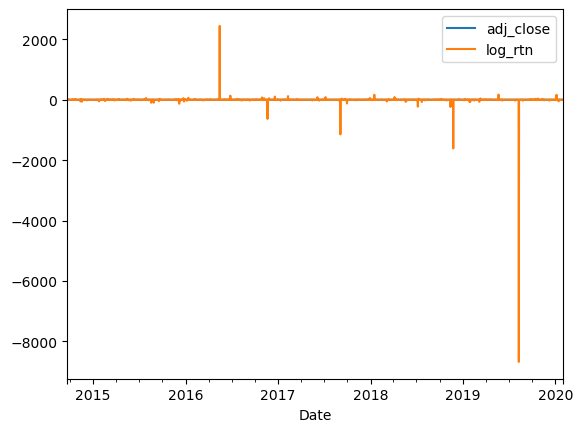

In [55]:
rets.plot()

##### Mean and Standard Deviation

In [56]:
rets.mean()

adj_close    0.002436
log_rtn     -5.762107
dtype: float64

In [57]:
rets.shape

(1961, 2)

In [58]:
number_of_obs = rets.shape[0]
deviations = rets - rets.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

adj_close      0.038651
log_rtn      209.398065
dtype: float64

In [59]:
rets.shape

(1961, 2)

In [60]:
rets.std()

adj_close      0.038651
log_rtn      209.398065
dtype: float64

In [61]:
annualised_vol = rets.std()*np.sqrt(252)
annualised_vol

adj_close       0.613563
log_rtn      3324.091238
dtype: float64

In [62]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [63]:
annualize_vol(rets,252)

adj_close       0.613563
log_rtn      3324.091238
dtype: float64

### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$


### Activity: Annualise a 1% monthly, 4% quarterly and 0.3% daily return:

In [64]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [65]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [66]:
rd = 0.003
(1+rd)**252 - 1

1.1273312564640139

#### Annualizing the returns of our three shares

In [67]:
n_days = rets.shape[0]
ret_per_day = (rets + 1).prod()**(1/n_days)-1
ret_per_day

adj_close    0.001690
log_rtn     -0.000602
dtype: float64

In [68]:
annualised_ret = (ret_per_day + 1)**252-1
annualised_ret

adj_close    0.530250
log_rtn     -0.140893
dtype: float64

In [69]:
ann_ret = (rets + 1).prod()**(252/n_days)-1
ann_ret

adj_close    0.530250
log_rtn     -0.140893
dtype: float64

In [70]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


In [71]:
annualize_rets(rets,252)

adj_close    0.530250
log_rtn     -0.140893
dtype: float64

#### Risk-adjust returns (Sharpe Ratio) 

In [72]:
riskfree_rate = 0.03
excess_return = ann_ret - riskfree_rate
sharpe_ratio = excess_return/annualised_vol
sharpe_ratio

adj_close    0.815320
log_rtn     -0.000051
dtype: float64

In [73]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [74]:
sharpe_ratio(rets,0.03,252)

adj_close    0.791631
log_rtn     -0.000055
dtype: float64

In [75]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [76]:
skewness(rets)

adj_close     0.121442
log_rtn     -35.745413
dtype: float64

In [77]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [78]:
kurtosis(rets)

adj_close       8.253197
log_rtn      1512.627851
dtype: float64

#### Test of Normality

In [79]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

In [80]:
is_normal(rets)

adj_close    False
log_rtn      False
dtype: bool

In [81]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

C:\Users\Nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


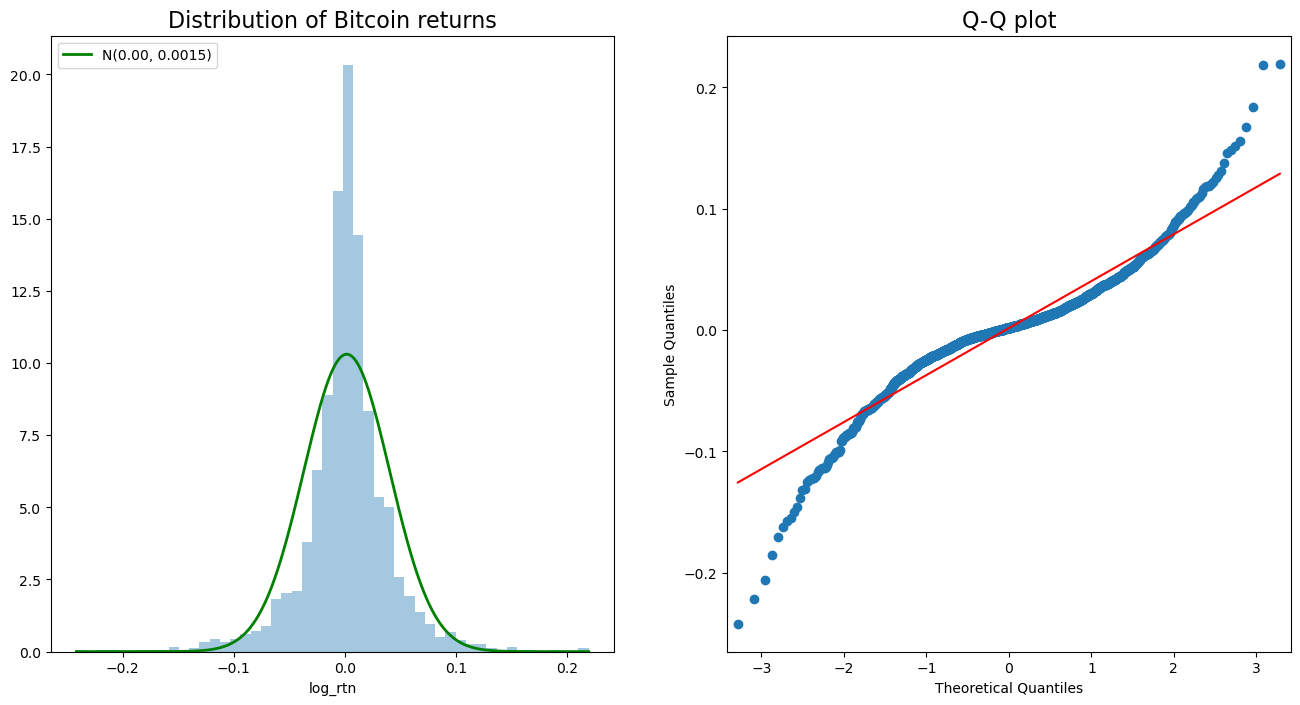

In [82]:
#Plot the histogram and the Q-Q Plot:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of Bitcoin returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

#plt.tight_layout()
#plt.savefig('Figure.png')
plt.show()

In [83]:
#Print summary statistics and check if the returns are normally distributed.

jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 2014-09-18 - 2020-01-31
Number of observations: 1962
Mean: 0.0016
Median: 0.0020
Min: -0.2418
Max: 0.2195
Standard Deviation: 0.0387
Skewness: -0.2958
Kurtosis: 5.2650
Jarque-Bera statistic: 2280.56 with p-value: 0.00


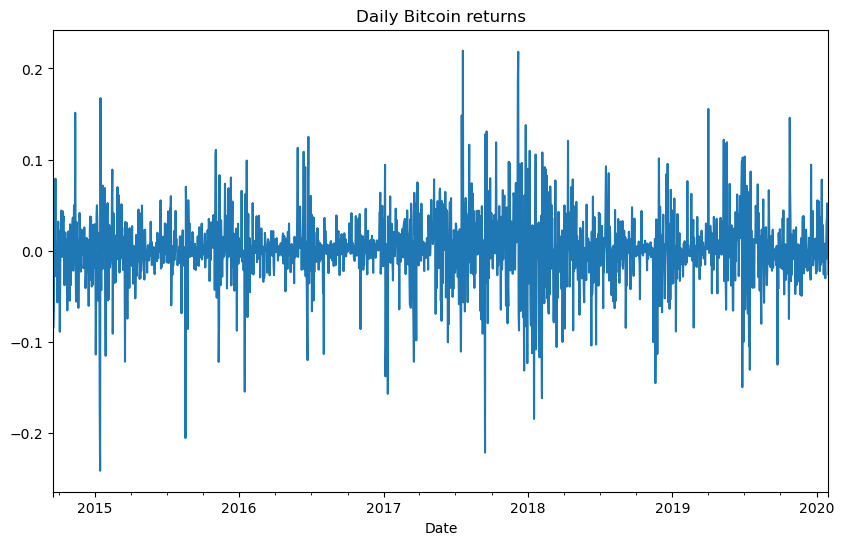

In [84]:
#Volatility Clustering
df.log_rtn.plot(title='Daily Bitcoin returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

### Market efficiency run test

In [85]:
ticker = 'BTC-GBP'
start = '1985-01-01'
end = '2020-02-01'
prices = np.array(yf.download(ticker, start, end)['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [86]:
returns=prices[1:]/prices[:-1] - 1
returns = returns[returns !=0] #filter out zero returns 
n = len(returns)
signs = np.sign(returns) #for the runs test, negatives are bearish, positives are bullish

In [87]:
runs = signs[1:] - signs[:-1] # A run is the first difference of the signs array

In [88]:
observed_runs = np.count_nonzero(runs==2) + np.count_nonzero(runs==-2) + 1
positive_returns = np.count_nonzero(signs == 1)
negative_returns = np.count_nonzero(signs == -1)
expected_runs = 2*positive_returns*negative_returns/n + 1
stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
z_stats = (observed_runs - expected_runs)/stdev_runs
p_value = 2*(1 - scs.norm.cdf(abs(z_stats)))
if p_value > 0.1:
    print('market is efficient')
elif z_stats > 0:
    print ('market is mean_reverting')
else:
    print ('market is trending')
print(observed_runs, int(expected_runs), round(stdev_runs, 2), round(z_stats, 4), round(p_value, 4))
    

market is efficient
995 975 22.02 0.8793 0.3793


### Asset -3 - Gold

In [89]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [90]:
df = yf.download('GC=F', 
                 start='1985-01-01', 
                 end='2020-02-01',
                 progress=False)
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

In [91]:
df.head()

,adj_close,log_rtn
Date,,
2000-08-31,278.299988,0.015937
2000-09-01,277.000000,-0.004682
2000-09-05,275.799988,-0.004342
2000-09-06,274.200012,-0.005818
2000-09-07,274.000000,-0.000730


Tthe return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


In [92]:
rets = df/df.shift(1) - 1

In [93]:
rets

,adj_close,log_rtn
Date,,
2000-08-31,NaN,NaN
2000-09-01,-0.004671,-1.293797
2000-09-05,-0.004332,-0.072731
2000-09-06,-0.005801,0.340089
2000-09-07,-0.000729,-0.874580
...,...,...
2020-01-27,0.003628,-0.126465
2020-01-28,-0.004820,-2.334140
2020-01-29,0.000382,-1.079135


In [94]:
rets = rets.dropna()

In [95]:
rets

,adj_close,log_rtn
Date,,
2000-09-01,-0.004671,-1.293797
2000-09-05,-0.004332,-0.072731
2000-09-06,-0.005801,0.340089
2000-09-07,-0.000729,-0.874580
2000-09-08,-0.002555,2.505605
...,...,...
2020-01-27,0.003628,-0.126465
2020-01-28,-0.004820,-2.334140
2020-01-29,0.000382,-1.079135


In [96]:
rets = df.pct_change().dropna()

In [97]:
rets.head()

,adj_close,log_rtn
Date,,
2000-09-01,-0.004671,-1.293797
2000-09-05,-0.004332,-0.072731
2000-09-06,-0.005801,0.340089
2000-09-07,-0.000729,-0.874580
2000-09-08,-0.002555,2.505605


In [98]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4866 entries, 2000-09-01 to 2020-01-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  4866 non-null   float64
 1   log_rtn    4866 non-null   float64
dtypes: float64(2)
memory usage: 114.0 KB


<AxesSubplot:xlabel='Date'>

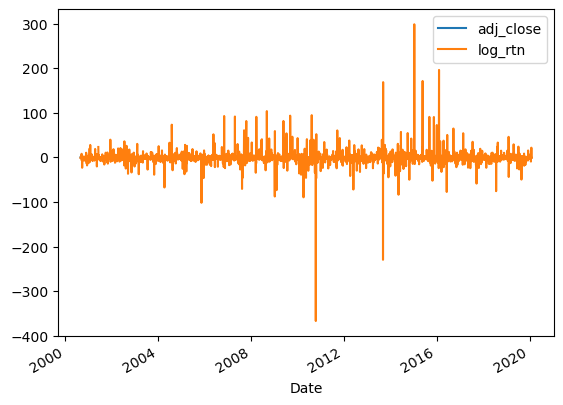

In [99]:
rets.plot()

##### Mean and Standard Deviation

In [100]:
rets.mean()

adj_close    0.000418
log_rtn           NaN
dtype: float64

In [101]:
rets.shape

(4866, 2)

In [102]:
number_of_obs = rets.shape[0]
deviations = rets - rets.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

adj_close    0.011004
log_rtn      0.000000
dtype: float64

In [103]:
rets.shape

(4866, 2)

In [104]:
rets.std()

adj_close    0.011004
log_rtn           NaN
dtype: float64

In [105]:
annualised_vol = rets.std()*np.sqrt(252)
annualised_vol

adj_close    0.174682
log_rtn           NaN
dtype: float64

In [106]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [107]:
annualize_vol(rets,252)

adj_close    0.174682
log_rtn           NaN
dtype: float64

### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$


### Activity: Annualise a 1% monthly, 4% quarterly and 0.3% daily return:

In [108]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [109]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [110]:
rd = 0.003
(1+rd)**252 - 1

1.1273312564640139

#### Annualizing the returns of our three shares

In [111]:
n_days = rets.shape[0]
ret_per_day = (rets + 1).prod()**(1/n_days)-1
ret_per_day

adj_close    0.000357
log_rtn           NaN
dtype: float64

In [112]:
annualised_ret = (ret_per_day + 1)**252-1
annualised_ret

adj_close    0.0942
log_rtn         NaN
dtype: float64

In [113]:
ann_ret = (rets + 1).prod()**(252/n_days)-1
ann_ret

adj_close    0.0942
log_rtn         NaN
dtype: float64

In [114]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


In [115]:
annualize_rets(rets,252)

adj_close    0.0942
log_rtn         NaN
dtype: float64

#### Risk-adjust returns (Sharpe Ratio) 

In [116]:
riskfree_rate = 0.03
excess_return = ann_ret - riskfree_rate
sharpe_ratio = excess_return/annualised_vol
sharpe_ratio

adj_close    0.367526
log_rtn           NaN
dtype: float64

In [117]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [118]:
sharpe_ratio(rets,0.03,252)

adj_close    0.356853
log_rtn           NaN
dtype: float64

In [119]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [120]:
skewness(rets)

adj_close   -0.165911
log_rtn           NaN
dtype: float64

In [121]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [122]:
kurtosis(rets)

adj_close    8.577889
log_rtn           NaN
dtype: float64

#### Test of Normality

In [123]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

In [124]:
is_normal(rets)

C:\Users\Nazia\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


adj_close    False
log_rtn      False
dtype: bool

In [125]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

C:\Users\Nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


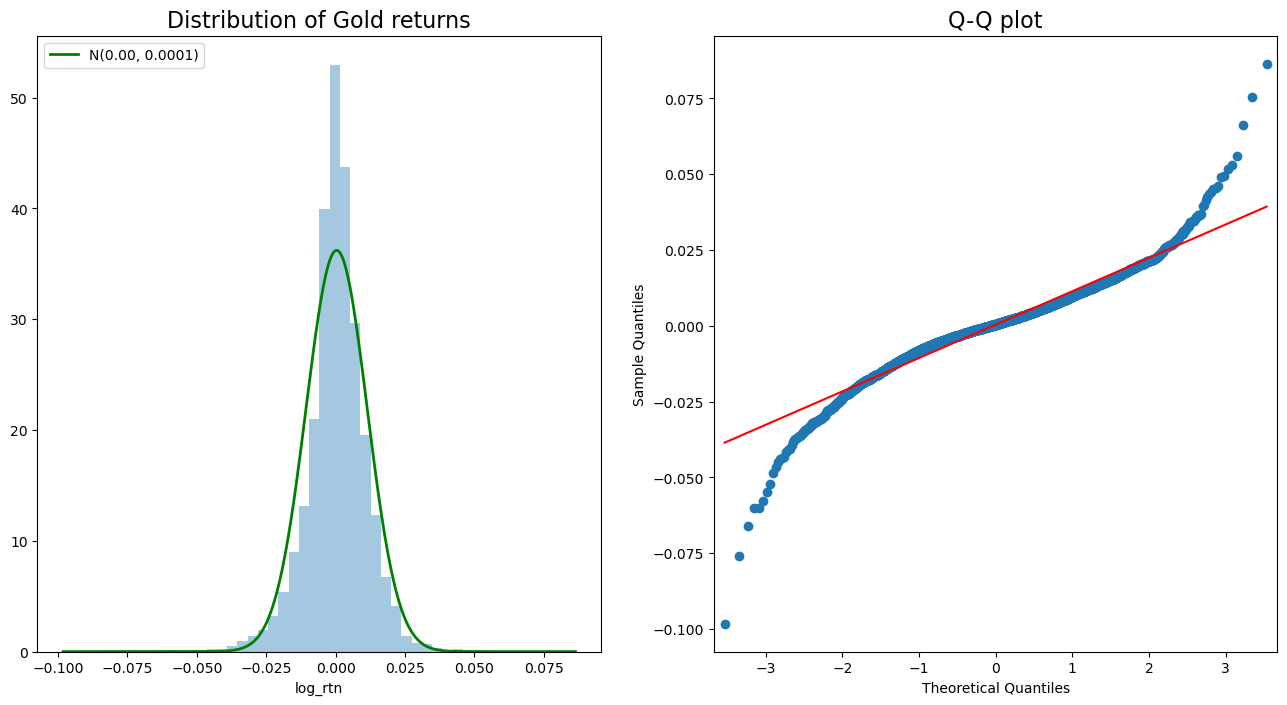

In [126]:
#Plot the histogram and the Q-Q Plot:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of Gold returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

#plt.tight_layout()
#plt.savefig('Figure.png')
plt.show()

In [127]:
#Print summary statistics and check if the returns are normally distributed.

jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 2000-08-31 - 2020-01-31
Number of observations: 4868
Mean: 0.0004
Median: 0.0004
Min: -0.0982
Max: 0.0864
Standard Deviation: 0.0110
Skewness: -0.2912
Kurtosis: 5.6832
Jarque-Bera statistic: 6603.71 with p-value: 0.00


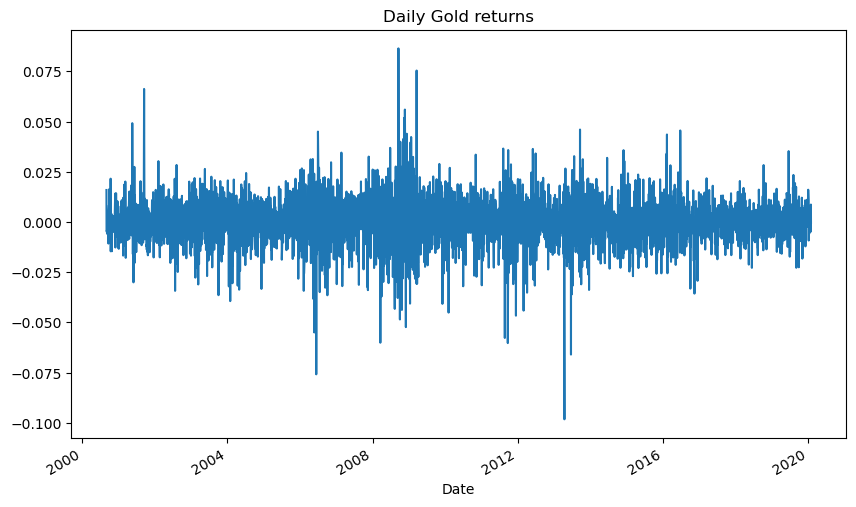

In [128]:
#Volatility Clustering
df.log_rtn.plot(title='Daily Gold returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

### Market efficiency run test

In [129]:
ticker = 'GC=F'
start = '1985-01-01'
end = '2020-02-01'
prices = np.array(yf.download(ticker, start, end)['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [130]:
returns=prices[1:]/prices[:-1] - 1
returns = returns[returns !=0] #filter out zero returns 
n = len(returns)
signs = np.sign(returns) #for the runs test, negatives are bearish, positives are bullish

In [131]:
runs = signs[1:] - signs[:-1] # A run is the first difference of the signs array

In [132]:
observed_runs = np.count_nonzero(runs==2) + np.count_nonzero(runs==-2) + 1
positive_returns = np.count_nonzero(signs == 1)
negative_returns = np.count_nonzero(signs == -1)
expected_runs = 2*positive_returns*negative_returns/n + 1
stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
z_stats = (observed_runs - expected_runs)/stdev_runs
p_value = 2*(1 - scs.norm.cdf(abs(z_stats)))
if p_value > 0.1:
    print('market is efficient')
elif z_stats > 0:
    print ('market is mean_reverting')
else:
    print ('market is trending')
print(observed_runs, int(expected_runs), round(stdev_runs, 2), round(z_stats, 4), round(p_value, 4))
    

market is mean_reverting
2542 2408 34.67 3.8418 0.0001


### Asset -4 - FTSE 100

In [133]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [134]:
df = yf.download('^FTSE', 
                 start='1985-01-01', 
                 end='2020-02-01',
                 progress=False)
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

In [135]:
df.head()

,adj_close,log_rtn
Date,,
1985-01-03,1206.099976,-0.011459
1985-01-04,1214.599976,0.007023
1985-01-07,1229.000000,0.011786
1985-01-08,1243.500000,0.011729
1985-01-09,1259.199951,0.012547


Tthe return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


In [136]:
rets = df/df.shift(1) - 1

In [137]:
rets

,adj_close,log_rtn
Date,,
1985-01-03,NaN,NaN
1985-01-04,0.007048,-1.612870
1985-01-07,0.011856,0.678257
1985-01-08,0.011798,-0.004827
1985-01-09,0.012626,0.069691
...,...,...
2020-01-27,-0.022924,-3.235186
2020-01-28,0.009255,-1.397255
2020-01-29,0.000388,-0.957930


In [138]:
rets = rets.dropna()

In [139]:
rets

,adj_close,log_rtn
Date,,
1985-01-04,0.007048,-1.612870
1985-01-07,0.011856,0.678257
1985-01-08,0.011798,-0.004827
1985-01-09,0.012626,0.069691
1985-01-10,0.001430,-0.886144
...,...,...
2020-01-27,-0.022924,-3.235186
2020-01-28,0.009255,-1.397255
2020-01-29,0.000388,-0.957930


In [140]:
rets = df.pct_change().dropna()

In [141]:
rets.head()

,adj_close,log_rtn
Date,,
1985-01-04,0.007048,-1.612870
1985-01-07,0.011856,0.678257
1985-01-08,0.011798,-0.004827
1985-01-09,0.012626,0.069691
1985-01-10,0.001430,-0.886144


In [142]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8862 entries, 1985-01-04 to 2020-01-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  8862 non-null   float64
 1   log_rtn    8862 non-null   float64
dtypes: float64(2)
memory usage: 207.7 KB


<AxesSubplot:xlabel='Date'>

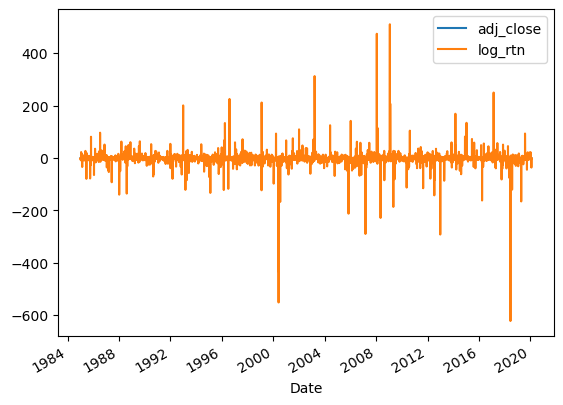

In [143]:
rets.plot()

##### Mean and Standard Deviation

In [144]:
rets.mean()

adj_close    0.000261
log_rtn           NaN
dtype: float64

In [145]:
rets.shape

(8862, 2)

In [146]:
number_of_obs = rets.shape[0]
deviations = rets - rets.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

adj_close    0.010792
log_rtn      0.000000
dtype: float64

In [147]:
rets.shape

(8862, 2)

In [148]:
rets.std()

adj_close    0.010792
log_rtn           NaN
dtype: float64

In [149]:
annualised_vol = rets.std()*np.sqrt(252)
annualised_vol

adj_close    0.171322
log_rtn           NaN
dtype: float64

In [150]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [151]:
annualize_vol(rets,252)

adj_close    0.171322
log_rtn           NaN
dtype: float64

### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$


### Activity: Annualise a 1% monthly, 4% quarterly and 0.3% daily return:

In [152]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [153]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [154]:
rd = 0.003
(1+rd)**252 - 1

1.1273312564640139

#### Annualizing the returns of our three shares

In [155]:
n_days = rets.shape[0]
ret_per_day = (rets + 1).prod()**(1/n_days)-1
ret_per_day

adj_close    0.000203
log_rtn           NaN
dtype: float64

In [156]:
annualised_ret = (ret_per_day + 1)**252-1
annualised_ret

adj_close    0.052474
log_rtn           NaN
dtype: float64

In [157]:
ann_ret = (rets + 1).prod()**(252/n_days)-1
ann_ret

adj_close    0.052474
log_rtn           NaN
dtype: float64

In [158]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


In [159]:
annualize_rets(rets,252)

adj_close    0.052474
log_rtn           NaN
dtype: float64

#### Risk-adjust returns (Sharpe Ratio) 

In [160]:
riskfree_rate = 0.03
excess_return = ann_ret - riskfree_rate
sharpe_ratio = excess_return/annualised_vol
sharpe_ratio

adj_close    0.131182
log_rtn           NaN
dtype: float64

In [161]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [162]:
sharpe_ratio(rets,0.03,252)

adj_close    0.127366
log_rtn           NaN
dtype: float64

In [163]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [164]:
skewness(rets)

adj_close   -0.293689
log_rtn           NaN
dtype: float64

In [165]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [166]:
kurtosis(rets)

adj_close    11.892373
log_rtn            NaN
dtype: float64

#### Test of Normality

In [167]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

In [168]:
is_normal(rets)

C:\Users\Nazia\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


adj_close    False
log_rtn      False
dtype: bool

In [169]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

C:\Users\Nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


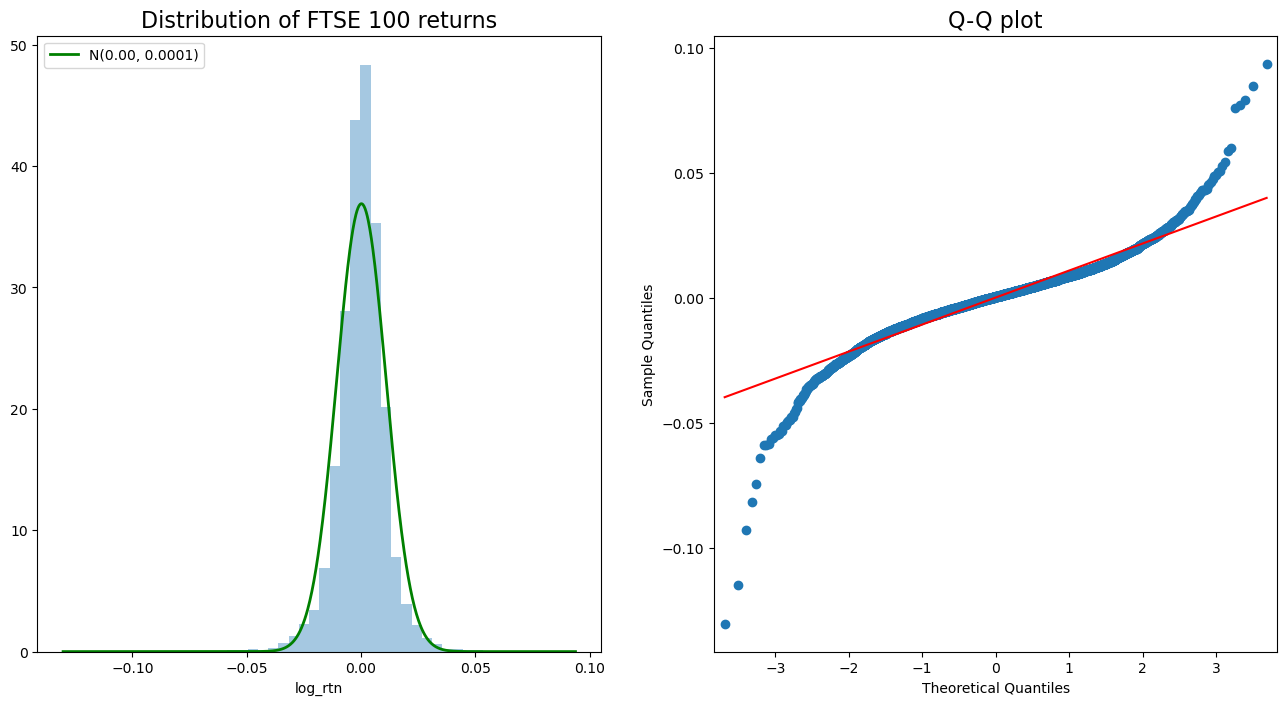

In [170]:
#Plot the histogram and the Q-Q Plot:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of FTSE 100 returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

#plt.tight_layout()
#plt.savefig('Figure.png')
plt.show()

In [171]:
#Print summary statistics and check if the returns are normally distributed.

jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1985-01-03 - 2020-01-31
Number of observations: 8863
Mean: 0.0002
Median: 0.0005
Min: -0.1303
Max: 0.0938
Standard Deviation: 0.0108
Skewness: -0.4732
Kurtosis: 9.5461
Jarque-Bera statistic: 33940.91 with p-value: 0.00


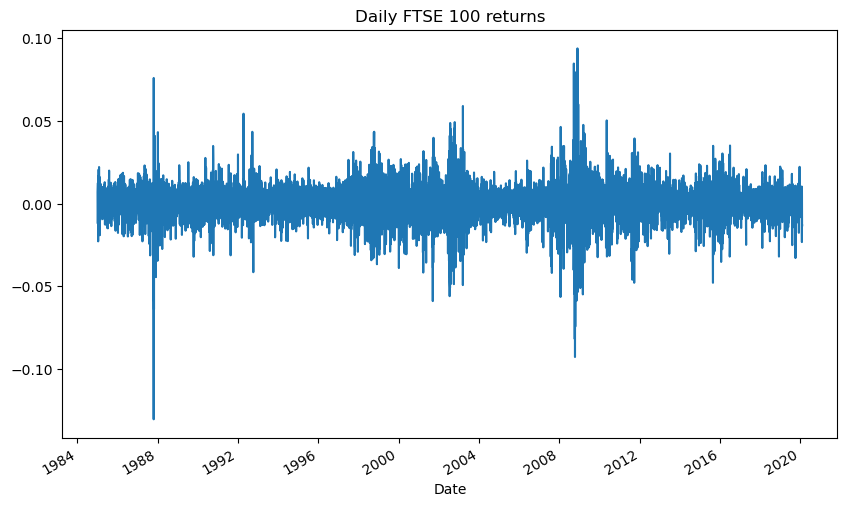

In [172]:
#Volatility Clustering
df.log_rtn.plot(title='Daily FTSE 100 returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

### Market efficiency run test

In [173]:
ticker = '^FTSE'
start = '1985-01-01'
end = '2020-02-01'
prices = np.array(yf.download(ticker, start, end)['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [174]:
returns=prices[1:]/prices[:-1] - 1
returns = returns[returns !=0] #filter out zero returns 
n = len(returns)
signs = np.sign(returns) #for the runs test, negatives are bearish, positives are bullish

In [175]:
runs = signs[1:] - signs[:-1] # A run is the first difference of the signs array

In [176]:
observed_runs = np.count_nonzero(runs==2) + np.count_nonzero(runs==-2) + 1
positive_returns = np.count_nonzero(signs == 1)
negative_returns = np.count_nonzero(signs == -1)
expected_runs = 2*positive_returns*negative_returns/n + 1
stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
z_stats = (observed_runs - expected_runs)/stdev_runs
p_value = 2*(1 - scs.norm.cdf(abs(z_stats)))
if p_value > 0.1:
    print('market is efficient')
elif z_stats > 0:
    print ('market is mean_reverting')
else:
    print ('market is trending')
print(observed_runs, int(expected_runs), round(stdev_runs, 2), round(z_stats, 4), round(p_value, 4))
    

market is efficient
4413 4414 46.93 -0.0299 0.9761


### Asset -5 - Amazon Stock

In [177]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [178]:
df = yf.download('AMZN', 
                 start='1985-01-01', 
                 end='2020-02-01',
                 progress=False)
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

In [179]:
df.head()

,adj_close,log_rtn
Date,,
1997-05-16,0.086458,-0.124461
1997-05-19,0.085417,-0.012114
1997-05-20,0.081771,-0.043623
1997-05-21,0.071354,-0.136269
1997-05-22,0.069792,-0.022134


Tthe return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


In [180]:
rets = df/df.shift(1) - 1

In [181]:
rets

,adj_close,log_rtn
Date,,
1997-05-16,NaN,NaN
1997-05-19,-0.012040,-0.902672
1997-05-20,-0.042685,2.601134
1997-05-21,-0.127392,2.123829
1997-05-22,-0.021891,-0.837572
...,...,...
2020-01-27,-0.017887,0.473765
2020-01-28,0.013624,-1.749743
2020-01-29,0.002563,-0.810838


In [182]:
rets = rets.dropna()

In [183]:
rets

,adj_close,log_rtn
Date,,
1997-05-19,-0.012040,-0.902672
1997-05-20,-0.042685,2.601134
1997-05-21,-0.127392,2.123829
1997-05-22,-0.021891,-0.837572
1997-05-23,0.074622,-4.251501
...,...,...
2020-01-27,-0.017887,0.473765
2020-01-28,0.013624,-1.749743
2020-01-29,0.002563,-0.810838


In [184]:
rets = df.pct_change().dropna()

In [185]:
rets.head()

,adj_close,log_rtn
Date,,
1997-05-19,-0.012040,-0.902672
1997-05-20,-0.042685,2.601134
1997-05-21,-0.127392,2.123829
1997-05-22,-0.021891,-0.837572
1997-05-23,0.074622,-4.251501


In [186]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5712 entries, 1997-05-19 to 2020-01-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  5712 non-null   float64
 1   log_rtn    5712 non-null   float64
dtypes: float64(2)
memory usage: 133.9 KB


<AxesSubplot:xlabel='Date'>

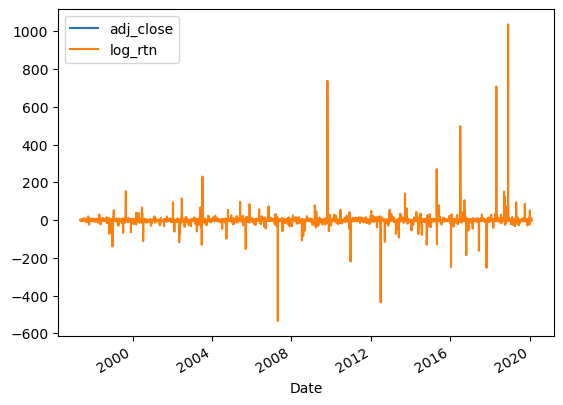

In [187]:
rets.plot()

##### Mean and Standard Deviation

In [188]:
rets.mean()

adj_close    0.001921
log_rtn           NaN
dtype: float64

In [189]:
rets.shape

(5712, 2)

In [190]:
number_of_obs = rets.shape[0]
deviations = rets - rets.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

adj_close    0.037384
log_rtn      0.000000
dtype: float64

In [191]:
rets.shape

(5712, 2)

In [192]:
rets.std()

adj_close    0.037384
log_rtn           NaN
dtype: float64

In [193]:
annualised_vol = rets.std()*np.sqrt(252)
annualised_vol

adj_close    0.593446
log_rtn           NaN
dtype: float64

In [194]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [195]:
annualize_vol(rets,252)

adj_close    0.593446
log_rtn           NaN
dtype: float64

### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$


### Activity: Annualise a 1% monthly, 4% quarterly and 0.3% daily return:

In [196]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [197]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [198]:
rd = 0.003
(1+rd)**252 - 1

1.1273312564640139

#### Annualizing the returns of our three shares

In [199]:
n_days = rets.shape[0]
ret_per_day = (rets + 1).prod()**(1/n_days)-1
ret_per_day

adj_close    0.001236
log_rtn           NaN
dtype: float64

In [200]:
annualised_ret = (ret_per_day + 1)**252-1
annualised_ret

adj_close    0.365288
log_rtn           NaN
dtype: float64

In [201]:
ann_ret = (rets + 1).prod()**(252/n_days)-1
ann_ret

adj_close    0.365288
log_rtn           NaN
dtype: float64

In [202]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


In [203]:
annualize_rets(rets,252)

adj_close    0.365288
log_rtn           NaN
dtype: float64

#### Risk-adjust returns (Sharpe Ratio) 

In [204]:
riskfree_rate = 0.03
excess_return = ann_ret - riskfree_rate
sharpe_ratio = excess_return/annualised_vol
sharpe_ratio

adj_close    0.564985
log_rtn           NaN
dtype: float64

In [205]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [206]:
sharpe_ratio(rets,0.03,252)

adj_close    0.548558
log_rtn           NaN
dtype: float64

In [207]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [208]:
skewness(rets)

adj_close    1.067488
log_rtn           NaN
dtype: float64

In [209]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [210]:
kurtosis(rets)

adj_close    13.466081
log_rtn            NaN
dtype: float64

#### Test of Normality

In [211]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

In [212]:
is_normal(rets)

C:\Users\Nazia\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


adj_close    False
log_rtn      False
dtype: bool

In [213]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

C:\Users\Nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


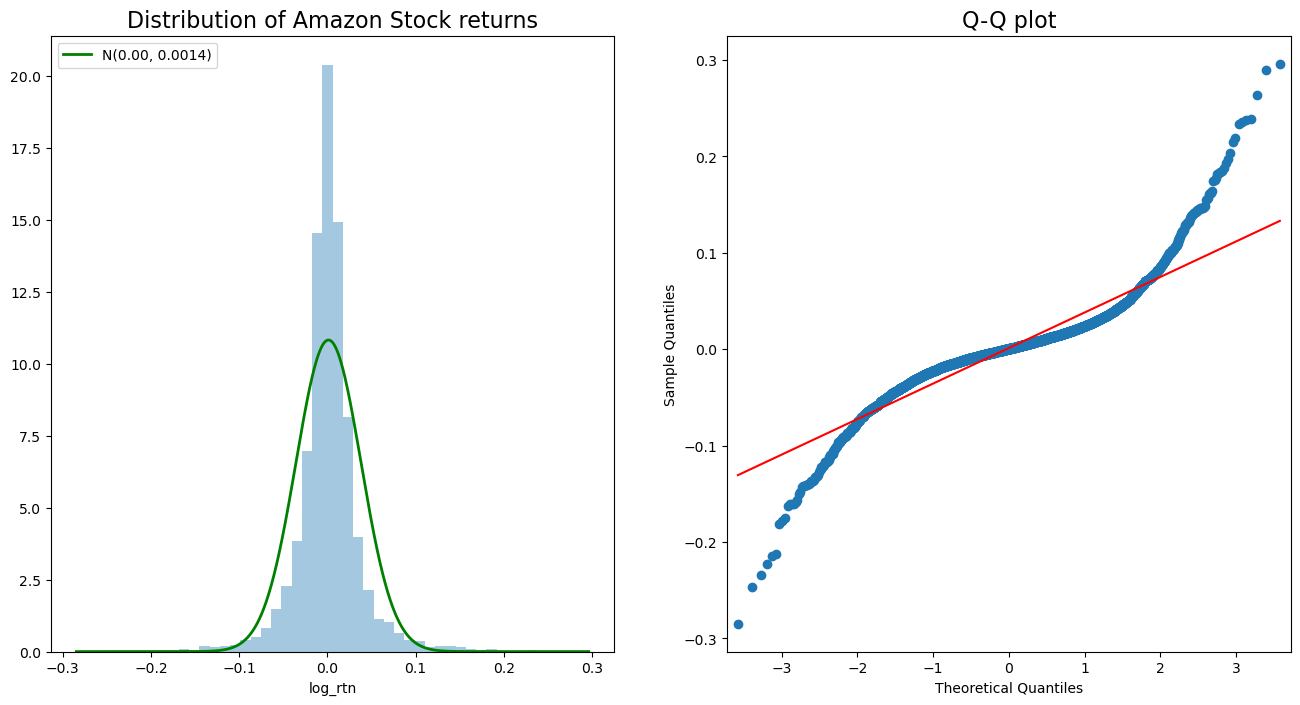

In [214]:
#Plot the histogram and the Q-Q Plot:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of Amazon Stock returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

#plt.tight_layout()
#plt.savefig('Figure.png')
plt.show()

In [215]:
#Print summary statistics and check if the returns are normally distributed.

jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1997-05-16 - 2020-01-31
Number of observations: 5715
Mean: 0.0012
Median: 0.0004
Min: -0.2846
Max: 0.2962
Standard Deviation: 0.0369
Skewness: 0.4612
Kurtosis: 8.8839
Jarque-Bera statistic: 18958.66 with p-value: 0.00


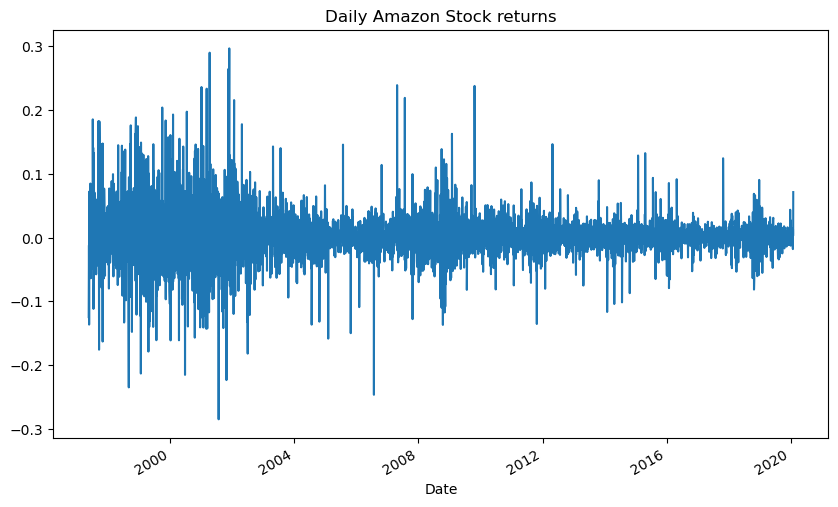

In [216]:
#Volatility Clustering
df.log_rtn.plot(title='Daily Amazon Stock returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

### Market efficiency run test

In [217]:
ticker = 'AMZN'
start = '1985-01-01'
end = '2020-02-01'
prices = np.array(yf.download(ticker, start, end)['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [218]:
returns=prices[1:]/prices[:-1] - 1
returns = returns[returns !=0] #filter out zero returns 
n = len(returns)
signs = np.sign(returns) #for the runs test, negatives are bearish, positives are bullish

In [219]:
runs = signs[1:] - signs[:-1] # A run is the first difference of the signs array

In [220]:
observed_runs = np.count_nonzero(runs==2) + np.count_nonzero(runs==-2) + 1
positive_returns = np.count_nonzero(signs == 1)
negative_returns = np.count_nonzero(signs == -1)
expected_runs = 2*positive_returns*negative_returns/n + 1
stdev_runs = (expected_runs*(expected_runs - 1)/(n-1))**(1/2)
z_stats = (observed_runs - expected_runs)/stdev_runs
p_value = 2*(1 - scs.norm.cdf(abs(z_stats)))
if p_value > 0.1:
    print('market is efficient')
elif z_stats > 0:
    print ('market is mean_reverting')
else:
    print ('market is trending')
print(observed_runs, int(expected_runs), round(stdev_runs, 2), round(z_stats, 4), round(p_value, 4))
    

market is efficient
2876 2839 37.68 0.9593 0.3374
